In [1]:
from auxiliary import values as v

import trimesh
import numpy as np
from auxiliary.data.dataset_ht import find_group

import matplotlib.pyplot as plt
from PIL import Image as PILImage
import io
from IPython.display import Image as IPyImage

from scipy.spatial import cKDTree
from sklearn.decomposition import PCA

import keyboard
import time
import scipy

import gdist
import rtree
import shapely
import pyglet
from pyglet.gl import *
import pyrender

plt.style.use('default')

In [2]:
type = 'Membrane'
tissue = 'myocardium'
specimen = '0209_E2'
group= find_group(specimen)
print(group)

mesh_path = v.data_path + f'{group}/3DShape/{type}/{tissue}/2019{specimen}_{tissue}.ply'
line_path = v.data_path + f'{group}/3DShape/Tissue/2019{specimen}Shape.ply'

cells_mesh = trimesh.load(mesh_path, file_type='ply')
tissue_mesh = trimesh.load(line_path, file_type='ply')

Gr3


In [3]:
# def visualize_mesh_with_face_colors(mesh, face_attribute):
#     # Create a color array based on the face attribute
#     unique_ids = np.unique(face_attribute)
#     color_map = plt.get_cmap('viridis', len(unique_ids))
#     colors = color_map(np.linspace(0, 1, len(unique_ids)))[:, :3]  # RGB colors
# 
#     # Map the colors to faces
#     color_dict = {uid: colors[i] for i, uid in enumerate(unique_ids)}
#     face_colors = np.array([color_dict[int(uid)] for uid in face_attribute])
# 
#     # Assign colors to mesh visual
#     mesh.visual.face_colors = np.hstack((face_colors, np.ones((len(face_colors), 1))))
#     return mesh
# 
# vertex_cell_ids = cells_mesh.metadata['_ply_raw']['face']['data']['cell_id']
# mesh = visualize_mesh_with_face_colors(cells_mesh, vertex_cell_ids)
# scene = mesh.scene()
# scene.show()

In [4]:
from meshes.utils.visualizer import CellVisualization
from meshes.utils.extractor import MeshFeatureExtractor
import pandas as pd

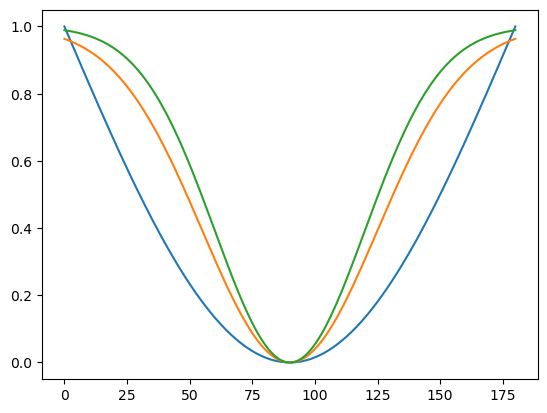

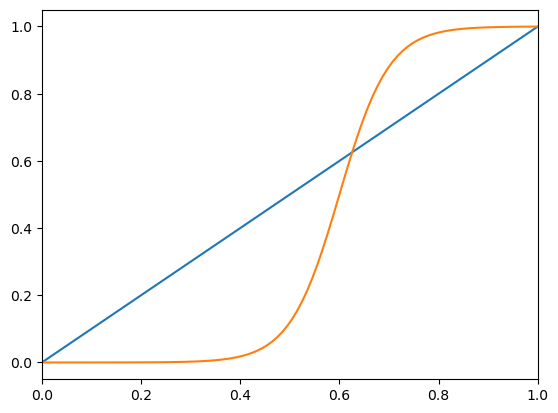

In [5]:
sigma = 35

x = np.linspace(0, 180, 180)
y = 1 - np.sin(np.deg2rad(x))
y_adjusted_30 = np.clip(1 - np.exp(-((x - 90) ** 2) / (2 * 30 ** 2)), 0, 1)
y_adjusted = np.clip(1 - np.exp(-((x - 90) ** 2) / (2 * sigma ** 2)), 0, 1)
plt.plot(x, y); plt.plot(x, y_adjusted); plt.plot(x, y_adjusted_30)
plt.show()

k = 20

x = np.linspace(0, 1, 100)
y = lambda x: 1 / (1 + np.exp(-k * (x - 0.6)))
plt.plot(x, x); plt.plot(x, y(x))
plt.xlim(0, 1)
plt.show()

In [6]:
# 1200 1000 900
extractor = MeshFeatureExtractor(cells_mesh, tissue_mesh)

In [9]:
# cell_id = extractor.cell_ids[1000]
cell_id = 3443
p = extractor.cell_perpendicularity(cell_id, display=True, dynamic_display=True)

s_standard = extractor.cell_sphericity(cell_id, method='standard')
c_standard = extractor.cell_columnarity(s_standard, p)

s_mod = y(s_standard)
c_mod = extractor.cell_columnarity(s_mod, p)

print(f'Perpendicularity: {p}')
print(f'Sphericity: {s_standard} - {s_mod}')
print(f'Columnarity: {c_standard} - {c_mod}')

Perpendicularity: 0.5038229342035196
Sphericity: 0.5365915438066368 - 0.21957082898228153
Columnarity: 0.23347580813406346 - 0.39319811488016737


In [8]:
res = extractor.extract()
res

,cell_id,perpendicularity,sphericity,columnarity
0,962,0.724567,0.493124,0.367265
1,1013,0.460224,0.720844,0.128474
2,1354,0.157474,0.695775,0.047907
3,1357,0.361456,0.672967,0.118208
4,1406,0.849063,0.608904,0.332065
...,...,...,...,...
1537,34324,0.711700,0.603088,0.282482
1538,34344,0.455810,0.686991,0.142673
1539,35721,0.006892,0.503656,0.003421
1540,35725,0.408820,0.564357,0.178099


In [9]:
res.to_csv('mesh_features.csv', index=False)

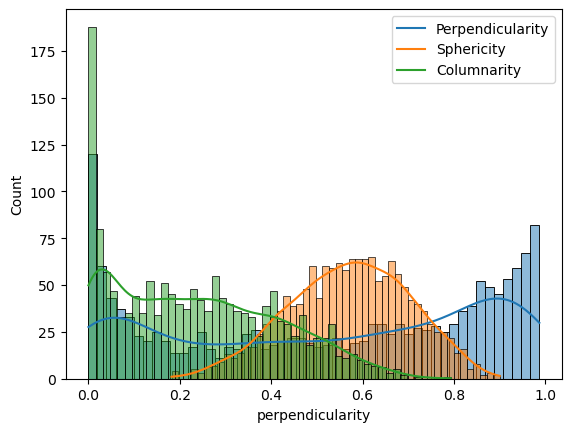

In [7]:
import seaborn as sns


res = pd.read_csv('mesh_features.csv')

sns.histplot(res['perpendicularity'], bins=50, kde=True)
sns.histplot(res['sphericity'], bins=50, kde=True)
sns.histplot(res['columnarity'], bins=50, kde=True)
plt.legend(['Perpendicularity', 'Sphericity', 'Columnarity'])
plt.show()